# A1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import collections

## 0. Data Load & Info

In [2]:
df = pd.read_csv("Kaggle_Salary.csv")

/Users/liuweilin/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets
0,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,3,"30,000-39,999"
1,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
2,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1,14,">250,000"
3,392,22-24,Male,-1,India,Bachelor’s degree,Other,1,0-49 employees,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,0,"0-9,999"
4,470,50-54,Male,-1,France,Master’s degree,Data Scientist,-1,0-49 employees,3-4,...,NaN,AWS Relational Database Service,NaN,NaN,NaN,NaN,NaN,-1,6,"60,000-69,999"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Columns: 248 entries, Time from Start to Finish (seconds) to Q10_buckets
dtypes: int64(30), object(218)
memory usage: 23.6+ MB


In [5]:
df.describe()

,Time from Start to Finish (seconds),Q2_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,...,Q26_OTHER_TEXT,Q27_OTHER_TEXT,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q10_Encoded
count,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,...,12497.000000,12497.00000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000,12497.000000
mean,14186.510202,-0.963191,29.216932,-0.250940,8.103465,20.657998,25.922621,4.303833,3.934304,262.422101,...,-0.959030,-0.96015,0.146995,-0.432104,-0.024486,-0.075458,-0.396975,-0.762663,0.084420,3.920061
std,72866.379285,0.978525,122.208237,8.257127,51.449272,101.726742,119.957741,33.044706,31.519867,615.567766,...,0.969486,0.93225,10.517404,6.495225,9.436367,9.187520,6.270585,3.395293,9.675712,4.188416
min,67.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,448.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,636.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000
75%,1054.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,56.000000,...,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,7.000000
max,843612.000000,39.000000,877.000000,137.000000,491.000000,812.000000,935.000000,366.000000,337.000000,2840.000000,...,35.000000,31.00000,162.000000,113.000000,143.000000,142.000000,108.000000,74.000000,144.000000,14.000000


## 1. Data Cleaning

### 1.1 Modify Q3(country) column
We find that the data covers the people from almost 60 countries and could result in large number of oneencoding features. In the same time, few number of people could not reflect the overall situation in one country. Therefore, we decide to forcus on **India** and **United States of America** and assign **Other** to the rest of the countries. Obviously, the size of the data remains the same.

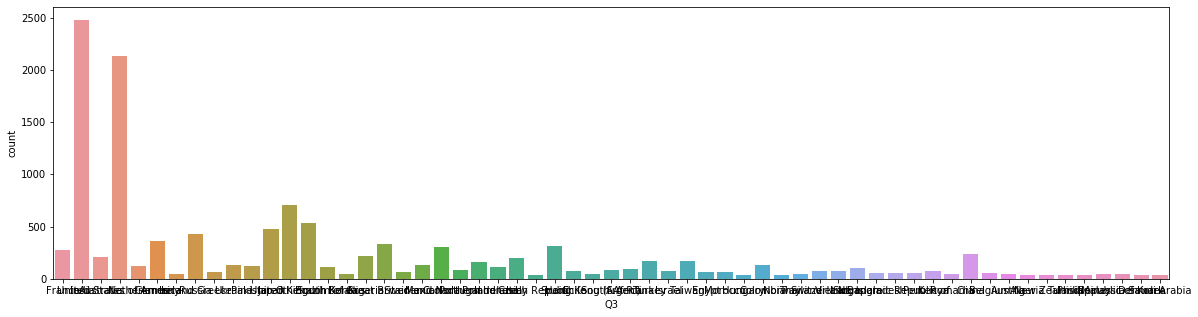

In [6]:
# Show the distribution of Q3
Q3_cates = [v for v in df['Q3'].unique() if type(v) == str]
fig, ax = plt.subplots(figsize=(20,5))
sns.countplot(x='Q3', data=df, ax=ax, order=Q3_cates)

In [7]:
print ("Countries Rank:")
df['Q3'].value_counts().head(10)

Countries Rank:


India                                                   2477
United States of America                                2134
Other                                                    705
Brazil                                                   535
Japan                                                    480
Russia                                                   426
Germany                                                  360
United Kingdom of Great Britain and Northern Ireland     333
Spain                                                    316
Canada                                                   301
Name: Q3, dtype: int64

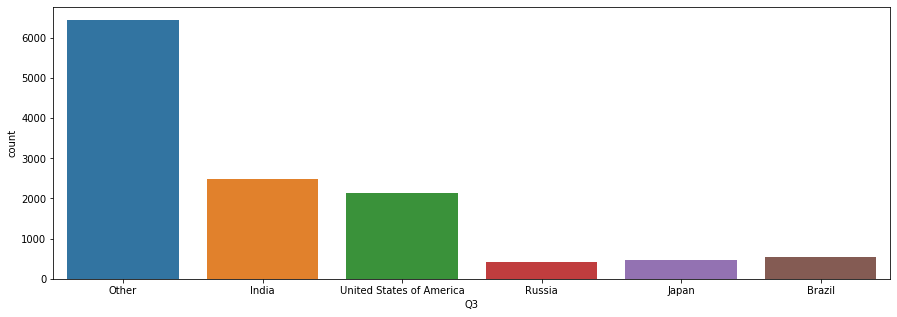

In [8]:
# Change the rest of the countries as Other
countries_selected = ["India", "United States of America", "Brazil", "Japan", "Russia"]
df["Q3"]=df["Q3"].apply(lambda x: x if x in countries_selected else "Other")
fig, ax = plt.subplots(figsize=(15,5))
sns.countplot(x='Q3', ax=ax, data=df)

### 1.2 Identify real NaN
Since null values in some columns(Qx_Part_x) indicate the user did not select the option in multiple questions, 
we need to encode value as 1 if not null else 0 

In [9]:
# Find the columns with NaN
for col_name in df.columns:
    if "Part" in col_name and "TEXT" not in col_name:
        df[col_name] = df[col_name].isnull().map({True:0, False:1})
    null_n = len(df[df[col_name].isnull()])
    if null_n:
        print(col_name, null_n, null_n / df.shape[0])

Q11 247 0.019764743538449227
Q14 1045 0.08362006881651596
Q15 1075 0.08602064495478914
Q19 1844 0.1475554132991918
Q22 1947 0.15579739137392976
Q23 1956 0.1565175642154117


### 1.3 Handle columns with nan
There are generally two methods handling the missing values in the columns. If the percentage of losing data is high,
we prefer to drop the columns. Otherwise we drop the corresponding rows. Also we could fill the missing the data
with most common value(for categorical data) or average value(for continuous data).

#### 1.3.1 Handle Q11
Q11 is "Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years". There are only around 2% of missing data. Since the categories are ranges of expense, we could not calculate the average value. Therefore, we use the **medium range of expense as the default value**.

In [10]:
df['Q11'].unique()

array(['$0 (USD)', '> $100,000 ($USD)', '$10,000-$99,999', '$100-$999',
       '$1000-$9,999', '$1-$99', nan], dtype=object)

The medium value is:  $100-$999


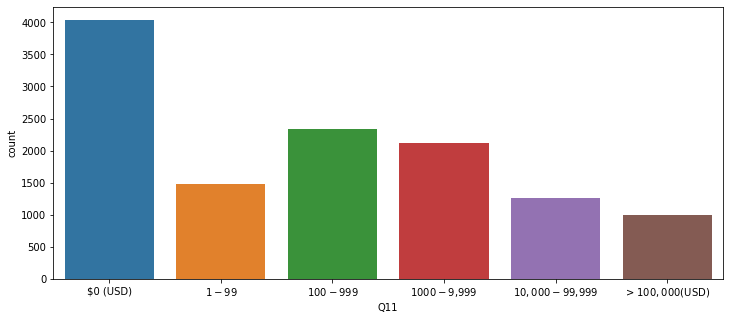

In [11]:
Q11_cates = ['$0 (USD)', '$1-$99', '$100-$999', '$1000-$9,999', '$10,000-$99,999', '> $100,000 ($USD)']
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q11', data=df, ax=ax, order=Q11_cates)
# Find the medium value
Q11_not_nan_half = (df.shape[0] - len(df[df['Q11'].isnull()]))//2
Q11_cnt = collections.Counter(df['Q11'])
t = 0
Q11_cate_med = Q11_cates[0]
for cate in Q11_cates:
    t += Q11_cnt[cate]
    if t > Q11_not_nan_half:
        print("The medium value is: ", cate)
        Q11_cate_med = cate
        break

In [12]:
# Set and Verify the modified Q11
df.at[df['Q11'].isnull(), 'Q11'] = Q11_cate_med
df[df['Q11'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


#### 1.3.2 Handle Q14
Q14 is "What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice".

In [13]:
df['Q14'].unique()

array(['Basic statistical software (Microsoft Excel, Google Sheets, etc.)',
       'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)',
       'Local development environments (RStudio, JupyterLab, etc.)',
       'Advanced statistical software (SPSS, SAS, etc.)', 'Other',
       'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)',
       nan], dtype=object)

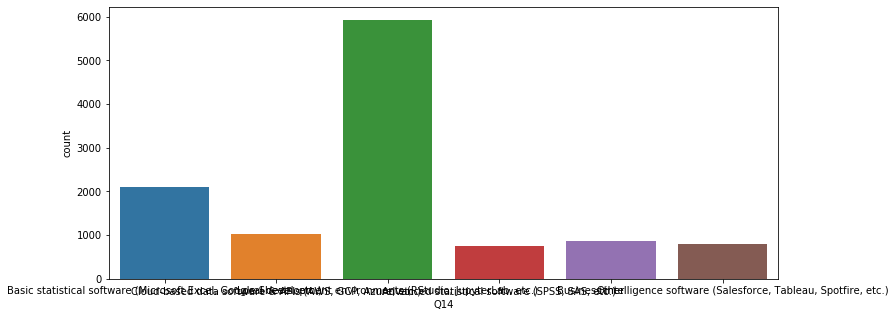

In [14]:
Q14_cates = [v for v in df['Q14'].unique() if type(v) == str]
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q14', data=df, ax=ax, order=Q14_cates)

Since the third categories has the highest proportion, we fill the missing value in Q14 with 'Local development environments (RStudio, JupyterLab, etc.)'

In [15]:
# Set and Verify the modified Q14
df.at[df['Q14'].isnull(), 'Q14'] = "Local development environments (RStudio, JupyterLab, etc.)"
df[df['Q11'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


#### 1.3.3 Handle Q15
Q15 is "How long have you been writing code to analyze data (at work or at school)?".

In [16]:
df['Q15'].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan], dtype=object)

The medium value is:  3-5 years


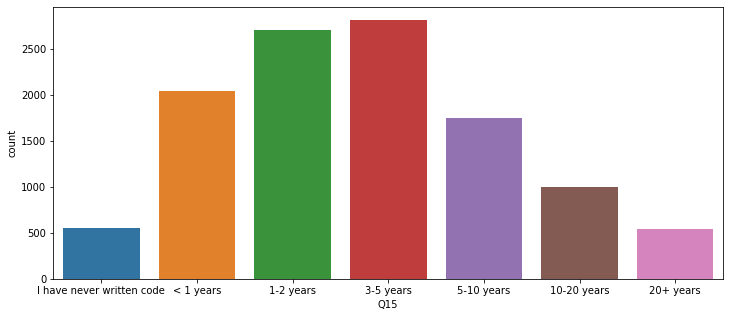

In [17]:
Q15_cates = ['I have never written code', '< 1 years', '1-2 years', '3-5 years', '5-10 years', '10-20 years', '20+ years']
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q15', data=df, ax=ax, order=Q15_cates)
# Find the medium value
Q15_not_nan_half = (df.shape[0] - len(df[df['Q15'].isnull()]))//2
Q15_cnt = collections.Counter(df['Q15'])
t = 0
Q15_cate_med = Q15_cates[0]
for cate in Q15_cates:
    t += Q15_cnt[cate]
    if t > Q15_not_nan_half:
        print("The medium value is: ", cate)
        Q15_cate_med = cate
        break

In [18]:
# Set and Verify the modified Q15
df.at[df['Q15'].isnull(), 'Q15'] = Q15_cate_med
df[df['Q15'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


#### 1.3.4 Handle Q19
Q19 is "What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice".

In [19]:
df['Q19'].unique()

array(['Python', nan, 'Java', 'R', 'SQL', 'C++', 'None', 'Other', 'C',
       'MATLAB', 'TypeScript', 'Javascript', 'Bash'], dtype=object)

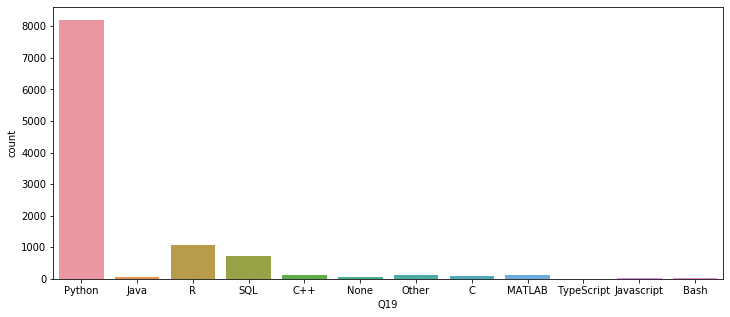

In [20]:
Q19_cates = [v for v in df['Q19'].unique() if type(v) == str]
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q19', data=df, ax=ax, order=Q19_cates)

Since "Python" is found to be the language recommended by most people, we fill the missing value with "Python"

In [21]:
# Set and Verify the modified Q19
df.at[df['Q19'].isnull(), 'Q19'] = "Python"
df[df['Q19'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


#### 1.3.5 Handle Q22
Q22 is "Have you ever used a TPU (tensor processing unit)?".

In [22]:
df['Q22'].unique()

array(['Never', nan, 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

The medium value is:  Never


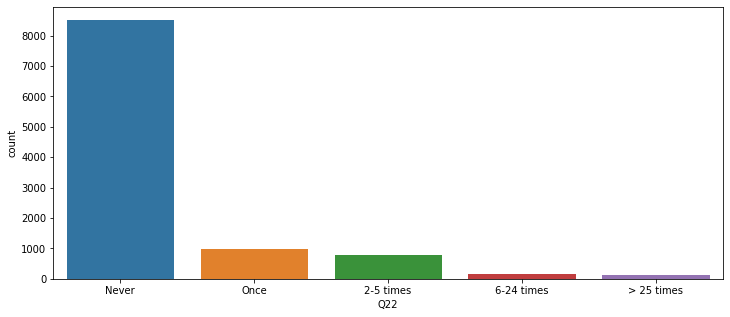

In [23]:
Q22_cates = ['Never', 'Once', '2-5 times', '6-24 times', '> 25 times']
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q22', data=df, ax=ax, order=Q22_cates)
# Find the medium value
Q22_not_nan_half = (df.shape[0] - len(df[df['Q22'].isnull()]))//2
Q22_cnt = collections.Counter(df['Q22'])
t = 0
Q22_cate_med = Q22_cates[0]
for cate in Q22_cates:
    t += Q22_cnt[cate]
    if t > Q22_not_nan_half:
        print("The medium value is: ", cate)
        Q22_cate_med = cate
        break

In [24]:
# Set and Verify the modified Q22
df.at[df['Q22'].isnull(), 'Q22'] = Q22_cate_med
df[df['Q22'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


#### 1.3.6 Handle Q23
Q23 is "For how many years have you used machine learning methods?".

In [25]:
df['Q23'].unique()

array(['1-2 years', nan, '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

The medium value is:  1-2 years


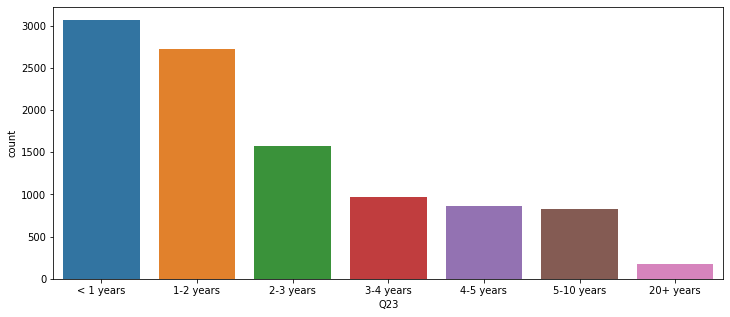

In [26]:
Q23_cates = ['< 1 years', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-10 years','20+ years']
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Q23', data=df, ax=ax, order=Q23_cates)
# Find the medium value
Q23_not_nan_half = (df.shape[0] - len(df[df['Q23'].isnull()]))//2
Q23_cnt = collections.Counter(df['Q23'])
t = 0
Q23_cate_med = Q23_cates[0]
for cate in Q23_cates:
    t += Q23_cnt[cate]
    if t > Q23_not_nan_half:
        print("The medium value is: ", cate)
        Q23_cate_med = cate
        break

In [27]:
# Set and Verify the modified Q22
df.at[df['Q23'].isnull(), 'Q23'] = Q23_cate_med
df[df['Q23'].isnull()]

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT,Q10_Encoded,Q10_buckets


### 1.4 Drop Useless Features
First of all, we need to remove **Q10, Q10_buckets**, since it is the duplicate column of 'Q10_Encoded'. 
Secondly, **Time from Start to Finish (seconds)** is not related to the salaries and we could also delete it.
Also, There are some **"TEXT"** features, which are integers. While the distance between different integers are different, the feature could be misleading. In the same time, the text could be of great flunctuation in values. Therefore, we plan to drop the these features

In [28]:
drop_cols = ['Q10', 'Q10_buckets', 'Time from Start to Finish (seconds)']
for col in df.columns:
    if  'OTHER' in col or 'TEXT' in col:
        drop_cols.append(col)
df.drop(labels=drop_cols, axis=1, inplace=True)
print("Drop: ", drop_cols)

Drop:  ['Q10', 'Q10_buckets', 'Time from Start to Finish (seconds)', 'Q2_OTHER_TEXT', 'Q5_OTHER_TEXT', 'Q9_OTHER_TEXT', 'Q12_OTHER_TEXT', 'Q13_OTHER_TEXT', 'Q14_Part_1_TEXT', 'Q14_Part_2_TEXT', 'Q14_Part_3_TEXT', 'Q14_Part_4_TEXT', 'Q14_Part_5_TEXT', 'Q14_OTHER_TEXT', 'Q16_OTHER_TEXT', 'Q17_OTHER_TEXT', 'Q18_OTHER_TEXT', 'Q19_OTHER_TEXT', 'Q20_OTHER_TEXT', 'Q21_OTHER_TEXT', 'Q24_OTHER_TEXT', 'Q25_OTHER_TEXT', 'Q26_OTHER_TEXT', 'Q27_OTHER_TEXT', 'Q28_OTHER_TEXT', 'Q29_OTHER_TEXT', 'Q30_OTHER_TEXT', 'Q31_OTHER_TEXT', 'Q32_OTHER_TEXT', 'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT']


### 1.5 Convert Categorical Variables
Categorical variables needs to be converted into numerical values since scikit-learn only takes numerical values as input in a numpy array.

We could represent categorical values using numbers, but this encoding implies an **ordered relationship** between the values in the category. To avoid this, we can encode categorical values using dummy variables.

Given the categorical features, we can convert these via onehotencoding where each category for each feature becomes a new column. A category's column will get a value of 1 if the original feature belonged to that category. Only one of the categorical feature columns can have of 1.

We find that the categorical features are: Q2, Q3, Q5, Q14, Q19

In [29]:
# Find the categorical variables
cate_cols = ['Q2', 'Q3', 'Q5', 'Q14', 'Q19']
for col in cate_cols:
    # Create dummy features for each categorical feature
    # Drop the first dummy variables because its value is implied
    # by the other dummy variable columns
    dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)

    # Add the new features to the dataframe via concating
    df = pd.concat([df, dummies], axis=1)

    # Drop the original categorical feature columns
    df.drop(col, axis=1, inplace=True)

### 1.6 Convert Integer Variables
Some columns contains string data but indicates integer values and we need to find and convert them.

In [30]:
# Print columns which should contain integer values
int_cols = []
for col in df.columns:
    us = list(df[col].unique())
    if us != [0,1] and us != [1,0] and col != "Q10_Encoded" and col not in cate_cols:
        int_cols.append(col)
        print(col, df[col].unique())

Q1 ['22-24' '40-44' '50-54' '55-59' '30-34' '18-21' '35-39' '25-29' '45-49'
 '60-69' '70+']
Q4 ['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree'
 'Some college/university study without earning a bachelor’s degree'
 'I prefer not to answer' 'No formal education past high school']
Q6 ['1000-9,999 employees' '> 10,000 employees' '0-49 employees'
 '50-249 employees' '250-999 employees']
Q7 ['0' '20+' '3-4' '1-2' '5-9' '10-14' '15-19']
Q8 ['I do not know'
 'We have well established ML methods (i.e., models in production for more than 2 years)'
 'No (we do not use ML methods)'
 'We are exploring ML methods (and may one day put a model into production)'
 'We recently started using ML methods (i.e., models in production for less than 2 years)'
 'We use ML methods for generating insights (but do not put working models into production)']
Q11 ['$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99']
Q15 ['1-2 years' 'I have never written

In [31]:
# Q1
Q1_dt = {'18-21':0, '22-24':1, '25-29':2, '30-34':3, '35-39':4, '40-44':5, '45-49':6, '50-54':7, '55-59':8, 
         '60-69':9, '70+':9}
df['Q1'] = df['Q1'].map(Q1_dt)
print("Q1: ", df['Q1'].unique())

# Q4
Q4_dt = {'I prefer not to answer':0, 'No formal education past high school':1, 
         'Some college/university study without earning a bachelor’s degree':2,
         'Professional degree':3, 'Bachelor’s degree':4, 'Master’s degree':5,  
         'Doctoral degree':6}
df['Q4'] = df['Q4'].map(Q4_dt)
print("Q4: ", df['Q4'].unique())

# Q6
Q6_dt = {'0-49 employees':1, '50-249 employees':5, '250-999 employees':25, 
         '1000-9,999 employees':250, '> 10,000 employees':250}
df['Q6'] = df['Q6'].map(Q6_dt)
print("Q6: ", df['Q6'].unique())

# Q7
Q7_dt = {'0':0, '1-2':1, '3-4':1, '5-9':2, '10-14':3, '15-19':4, '20+':5}
df['Q7'] = df['Q7'].map(Q7_dt)
print("Q7: ", df['Q7'].unique())

# Q8
Q8_dt = {'I do not know':0,
         'No (we do not use ML methods)': 1,
         'We use ML methods for generating insights (but do not put working models into production)':2,
         'We are exploring ML methods (and may one day put a model into production)':3,
         'We recently started using ML methods (i.e., models in production for less than 2 years)':4,
         'We have well established ML methods (i.e., models in production for more than 2 years)':5}
df['Q8'] = df['Q8'].map(Q8_dt)
print("Q8: ", df['Q8'].unique())

# Q11
Q11_dt = {'$0 (USD)':0, '$1-$99':1, '$100-$999':10, '$1000-$9,999':100, '$10,000-$99,999':1000, 
          '> $100,000 ($USD)':1000}
df['Q11'] = df['Q11'].map(Q11_dt)
print("Q11: ", df['Q11'].unique())

# Q15
Q15_dt = {'I have never written code':0, '< 1 years':1, '1-2 years':2, '3-5 years':4,
          '5-10 years':8, '10-20 years':16,'20+ years':16}
df['Q15'] = df['Q15'].map(Q15_dt)
print("Q15: ", df['Q15'].unique())

# Q22
Q22_dt = {'Never':0, 'Once':1, '2-5 times':3, '6-24 times':15, '> 25 times':15}
df['Q22'] = df['Q22'].map(Q22_dt)
print("Q22: ", df["Q22"].unique())

# Q23
Q23_dt = {'< 1 years':0, '1-2 years':1, '2-3 years':2, '3-4 years':3, '4-5 years':4, '5-10 years':8, 
          '10-15 years':12, '20+ years':12}
df['Q23'] = df['Q23'].map(Q23_dt)
print("Q23: ", df["Q23"].unique())

Q1:  [1 5 7 8 3 0 4 2 6 9]
Q4:  [5 3 4 6 2 0 1]
Q6:  [250   1   5  25]
Q7:  [0 5 1 2 3 4]
Q8:  [0 5 1 3 4 2]
Q11:  [   0 1000   10  100    1]
Q15:  [ 2  0  1 16  4  8]
Q22:  [ 0  1 15  3]
Q23:  [ 1  2  0 12  3  4  8]


## 2. Exploratory data analysis

Firstly, we have a look at the distribution of Q10_encoding.

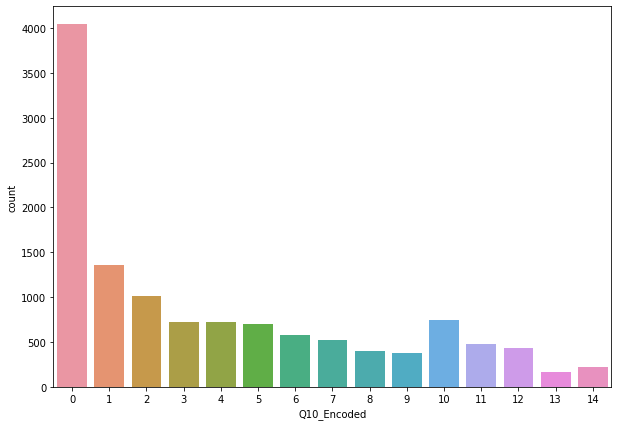

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x='Q10_Encoded', data=df)

We find that most of the people have salaries within 0(0-9999$).
We further look at the salaries for different genders. 

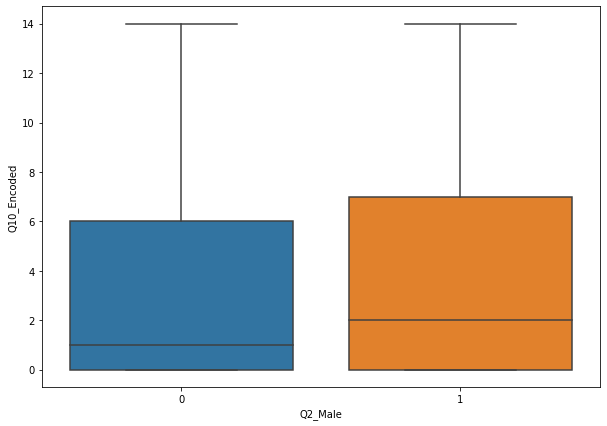

In [33]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Q2_Male', y='Q10_Encoded', data=df)

We find that male has higher salaries than the other genders and the gender features ought to be maintained for prediction.
Then we try to analyze the variation of salaries for people at different ages.

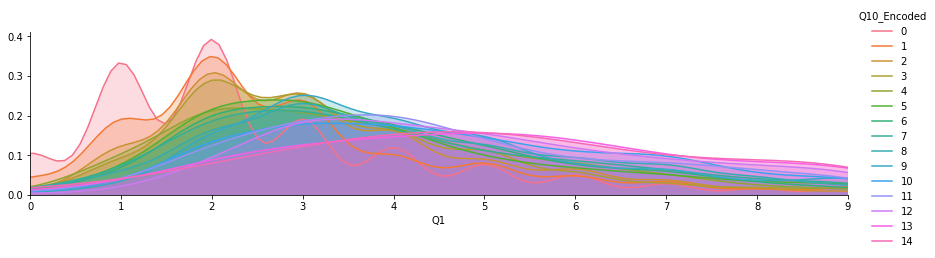

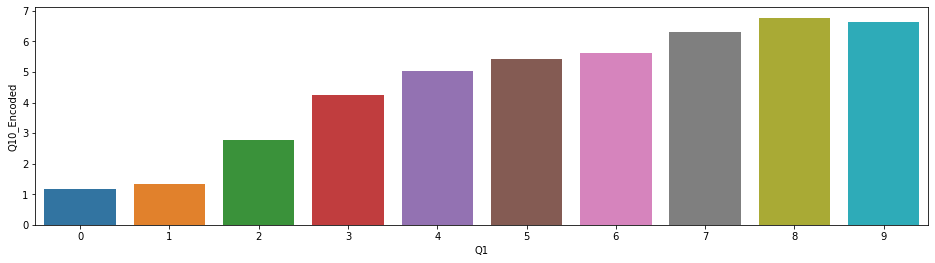

In [34]:
facet = sns.FacetGrid(df, hue='Q10_Encoded', aspect=4)
facet.map(sns.kdeplot, 'Q1', shade=True)
facet.set(xlim=(0, df['Q1'].max()))
facet.add_legend()

fig, ax = plt.subplots(1,1,figsize=(16,4))
age_mean = df[['Q1','Q10_Encoded']].groupby(['Q1'],as_index=False).mean()
sns.barplot(x='Q1', y='Q10_Encoded', data=age_mean)

We find that younger people tend to have lower wage. As the age grows, people are paid more. However, the speed of growth tends to decrease and the salaries are even reduced at elder age. In our model, it is also necessary to use the age feature to make the prediction.

Finally, we are going to visualize the order of **feature importance**. Right now, we have over 200 features and we try to pick top 20 features related to Q10_encoded and show it in the figure.

Top 2 columns:  ['Q10_Encoded', 'Q3_United States of America']
Top 10 columns:  ['Q10_Encoded', 'Q3_United States of America', 'Q15', 'Q11', 'Q1', 'Q23', 'Q9_Part_3', 'Q8', 'Q7', 'Q9_Part_1']


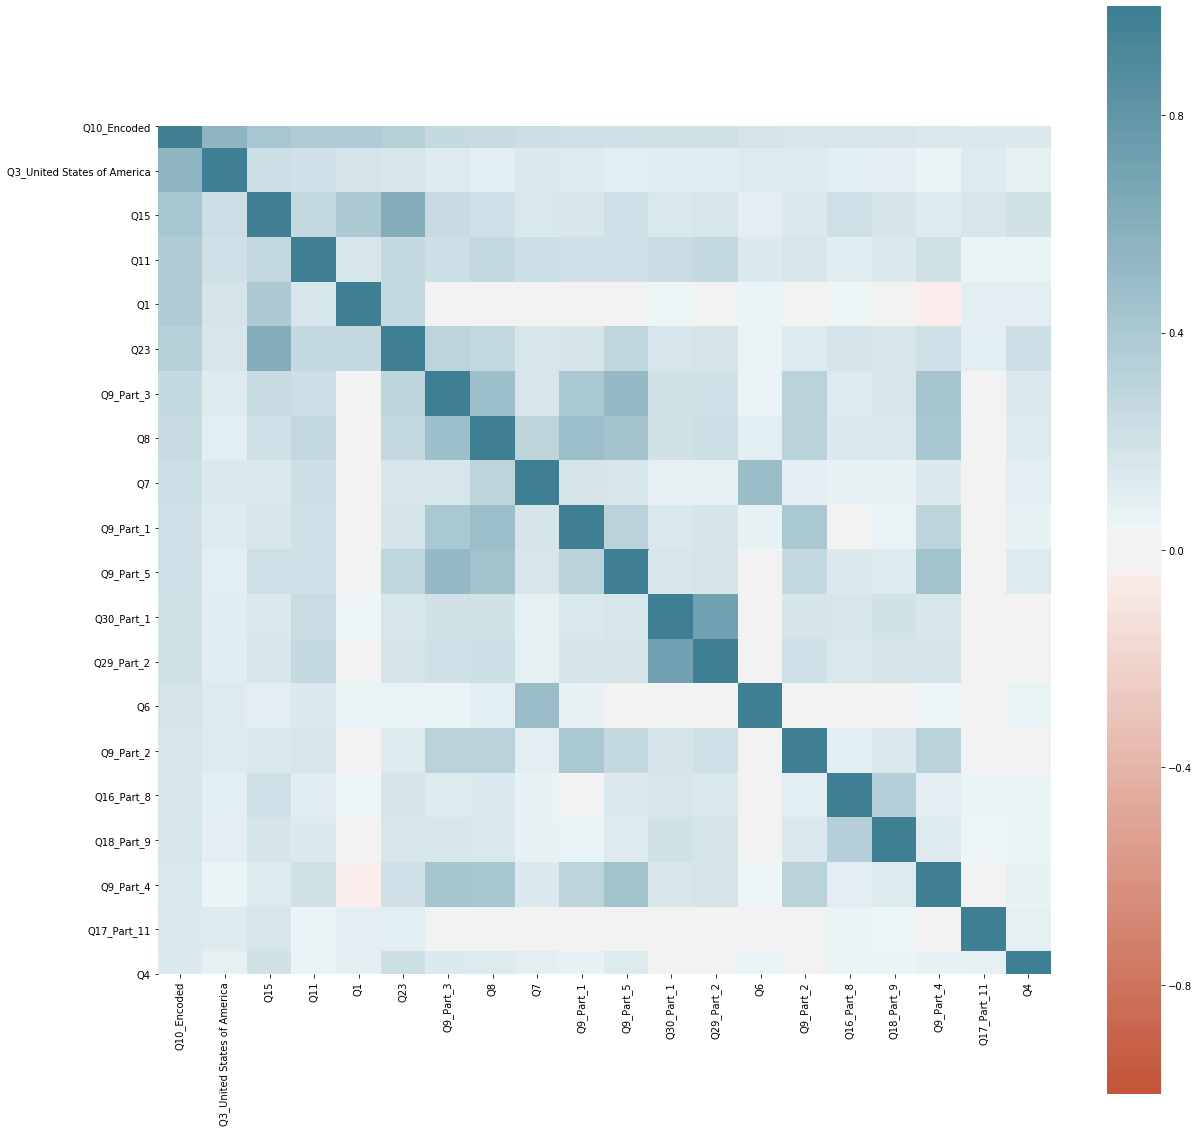

In [35]:
fig, ax = plt.subplots(1,1,figsize=(20,20))
corr = df.corr()
corr_Q10 = corr['Q10_Encoded']
print("Top 2 columns: ", list(corr_Q10.nlargest(2).index))
print("Top 10 columns: ", list(corr_Q10.nlargest(10).index))
top20 = list(corr_Q10.nlargest(20).index)
corr = corr.loc[top20, top20]

sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    ax = ax,
    square=True
)
# ax.set_xticklabels(
#     ax.get_xticklabels(),
#     rotation=45,
#     horizontalalignment='right'
# );

The most related 5 columns are:
* Q3: In which country do you currently reside?
* Q15: How long have you been writing code to analyze data (at work or at school)?
* Q1: What is your age (# years)?
* Q23: For how many years have you used machine learning methods?
* Q11: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?
* Q9_Part_3: Q9_Part_3 Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Build prototypes to explore applying machine learning to new areas
* Q8:Does your current employer incorporate machine learning methods into their business?
* Q7:Approximately how many individuals are responsible for data science workloads at your place of business?
* Q9_Part_1: Select any activities that make up an important part of your role at work: (Select all that apply) - Selected Choice - Analyze and understand data to influence product or business decisions

## 3. Feature Selection

### 3.1 Split the labels
We need to seperate the labels before we do feature selection

In [36]:
X = df.drop(['Q10_Encoded'],axis=1)
y = df['Q10_Encoded']

### 3.2 Removing feature with low variance
In most of the columns are binary values. We set the p in Bernuli as 0.9, which means 0.9 * (1 - 0.9) is the variance. It is a really small value. If the variance in some column is smaller than that value, it indicates that the variance in the column is really small and we could simply remove that feature. 

In [37]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.95 * (1 - .95)))
X = sel.fit_transform(X)
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(12497, 152)


### 3.2 Select features with top mutual info
Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency. Then we use SelectKBest method provided in sklearn to select the best 30 features.

In [38]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

X = SelectKBest(mutual_info_classif, k=100).fit_transform(X, y)
print("X shape: ", X.shape)

X shape:  (12497, 100)


## 4. Model implementation

### 4.1 Normalization
Having features that have different scales can cause problems in some machine learning models since a lot of the models are based on the concept of Euclidean Distances. This means that features with greater scales would have a greater impact on the solution, then those of smaller values.
We can rectify this situation my scaling the independent values. This can be done with the scaler function.

In [39]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### 4.2 Train and Eval logistic regression model with 10-fold cross-validation

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import KFold
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")

# 10-fold cross validation algorithm
def ten_cross_validate(solver):
    kfold = KFold(n_splits=10)
    kfold.get_n_splits(X)

    accuracy = np.zeros(10)
    np_idx = 0

    for train_idx, test_idx in kfold.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        model = LogisticRegression(solver=solver)
        model.fit(X_train, y_train)

        predictions = model.predict(X_test)

        ACC = accuracy_score(y_test, predictions) * 100
        accuracy[np_idx] = ACC
        np_idx += 1

        print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   

    print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

# solvers = ['newton-cg', 'lbfgs', 'liblinear']
# for solver in solvers:
#     print("solver: ", solver)
#     ten_cross_validate(solver)
print("Best Average Score is: 34.746%(4.353%)")

solver:  newton-cg
Fold 1: Accuracy: 28.56%
Fold 2: Accuracy: 32.24%
Fold 3: Accuracy: 32.4%
Fold 4: Accuracy: 31.36%
Fold 5: Accuracy: 32.32%
Fold 6: Accuracy: 35.52%
Fold 7: Accuracy: 32.64%
Fold 8: Accuracy: 38.671%
Fold 9: Accuracy: 42.034%
Fold 10: Accuracy: 41.713%
Average Score: 34.746%(4.353%)
solver:  lbfgs
Fold 1: Accuracy: 28.56%
Fold 2: Accuracy: 32.24%
Fold 3: Accuracy: 32.4%
Fold 4: Accuracy: 31.36%
Fold 5: Accuracy: 32.32%
Fold 6: Accuracy: 35.52%
Fold 7: Accuracy: 32.64%
Fold 8: Accuracy: 38.671%
Fold 9: Accuracy: 42.034%
Fold 10: Accuracy: 41.713%
Average Score: 34.746%(4.353%)
solver:  liblinear
Fold 1: Accuracy: 28.32%
Fold 2: Accuracy: 32.4%
Fold 3: Accuracy: 32.32%
Fold 4: Accuracy: 30.96%
Fold 5: Accuracy: 32.16%
Fold 6: Accuracy: 35.6%
Fold 7: Accuracy: 32.56%
Fold 8: Accuracy: 38.591%
Fold 9: Accuracy: 42.114%
Fold 10: Accuracy: 41.633%
Average Score: 34.666%(4.423%)


The mean and std of accurracy of different models has been shown above. Based on mean of accuracy, model with newton-cg has the lowest bias. Based on std of accuracy, model with liblinear also has the lowest variance. Therefore, based on bias-variance trade-off, the model with "liblinear" as the solver performs the best.

## 5. Model Tuning

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
print(type(X_train), X_train.shape)
print(type(y_train), y_train.shape)
print(type(X_test), X_test.shape)
print(type(y_test), y_test.shape)

<class 'numpy.ndarray'> (8747, 100)
<class 'pandas.core.series.Series'> (8747,)
<class 'numpy.ndarray'> (3750, 100)
<class 'pandas.core.series.Series'> (3750,)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

parameters = {'solver': ['newton-cg','lbfgs','liblinear','sag'], 
              'C':[0.001,0.01,0.05,0.1,0.5,1,5,10, 100]}

# clf = GridSearchCV(
#     LogisticRegression(), parameters, scoring="accuracy", cv=10
# )
# clf.fit(X_train, y_train)

# print("Best parameters set found on development set:")
# print(clf.best_params_)
# print("Grid scores on development set:")
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print()

# print("Detailed classification report:")
# y_true, y_pred = y_test, clf.predict(X_test)
# print(classification_report(y_true, y_pred))

# optimal_C = clf.best_params_['C']
# optimal_solver = clf.best_params_['solver']

optimal_C = 0.1
optimal_solver = 'newton-cg'
print("optimal C: ", optimal_C, " optimal solver: ", optimal_solver)

Best parameters set found on development set:
{'C': 0.1, 'solver': 'newton-cg'}
Grid scores on development set:
0.326 (+/-0.002) for {'C': 0.001, 'solver': 'newton-cg'}
0.326 (+/-0.002) for {'C': 0.001, 'solver': 'lbfgs'}
0.327 (+/-0.003) for {'C': 0.001, 'solver': 'liblinear'}
0.326 (+/-0.002) for {'C': 0.001, 'solver': 'sag'}
0.350 (+/-0.012) for {'C': 0.01, 'solver': 'newton-cg'}
0.350 (+/-0.012) for {'C': 0.01, 'solver': 'lbfgs'}
0.348 (+/-0.009) for {'C': 0.01, 'solver': 'liblinear'}
0.350 (+/-0.012) for {'C': 0.01, 'solver': 'sag'}
0.352 (+/-0.008) for {'C': 0.05, 'solver': 'newton-cg'}
0.352 (+/-0.008) for {'C': 0.05, 'solver': 'lbfgs'}
0.349 (+/-0.009) for {'C': 0.05, 'solver': 'liblinear'}
0.352 (+/-0.008) for {'C': 0.05, 'solver': 'sag'}
0.353 (+/-0.011) for {'C': 0.1, 'solver': 'newton-cg'}
0.353 (+/-0.011) for {'C': 0.1, 'solver': 'lbfgs'}
0.351 (+/-0.011) for {'C': 0.1, 'solver': 'liblinear'}
0.353 (+/-0.011) for {'C': 0.1, 'solver': 'sag'}
0.349 (+/-0.012) for {'C': 0.5, 

## 6. Testing & Discussion

Based on grid search, we found the optimal parameters for the logistic model.

In [51]:
optimal_model = LogisticRegression(C=optimal_C, solver=optimal_solver)

With optimal hyperparameters, we plot the learning curve in the training process.

<module 'matplotlib.pyplot' from '/Users/liuweilin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

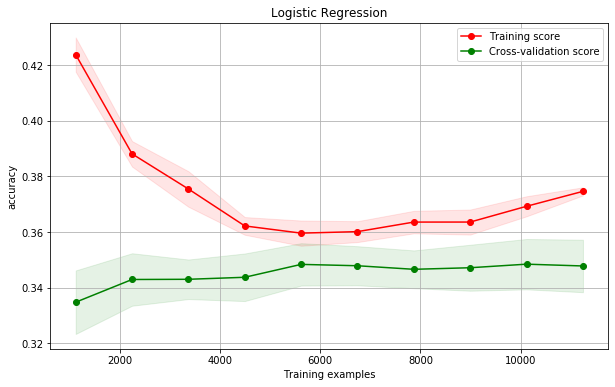

In [55]:
# Plot the learning curve
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1,scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    #train_sizes=np.linspace(.1, 1.0, cv)
    #train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, \
    #  scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)

    train_sizes = [ 1124,  2248,  3372,  4496,  5620,  6744,  7868,  8992, 10116, 11241]
    train_scores = [[0.40569395, 0.4297153,  0.4252669,  0.4252669,  0.4252669,  0.4252669,
                      0.4252669,  0.4252669,  0.4252669,  0.4252669, ],
                     [0.39457295, 0.3816726,  0.39857651, 0.38656584, 0.38656584, 0.38656584,
                      0.38656584, 0.38656584, 0.38656584, 0.38656584],
                     [0.37455516, 0.36476868, 0.36150652, 0.38137604, 0.378707,  0.378707,
                      0.378707,   0.378707,   0.378707,   0.378707  ],
                     [0.3594306,  0.35653915, 0.35787367, 0.36098754, 0.36743772, 0.363879,
                      0.363879,   0.363879,   0.363879,   0.363879,  ],
                     [0.35765125, 0.35800712, 0.35266904, 0.35587189, 0.37117438, 0.36120996,
                      0.35978648, 0.35978648, 0.35978648, 0.35978648],
                     [0.36046856, 0.35913405, 0.35483393, 0.36328588, 0.35854093, 0.36892052,
                      0.36254448, 0.35779953, 0.35779953, 0.35779953],
                     [0.36502288, 0.36197255, 0.3594306,  0.36553127, 0.3641332,  0.36057448,
                      0.37430097, 0.36184545, 0.36133706, 0.36133706],
                     [0.36209964, 0.36176601, 0.36120996, 0.36143238, 0.36376779, 0.35887456,
                      0.36565836, 0.3761121,  0.36232206, 0.36232206],
                     [0.36951364, 0.36822855, 0.36694346, 0.37089759, 0.37119415, 0.36625148,
                      0.3727758,  0.37000791, 0.37504943, 0.36140767],
                     [0.3737212,  0.37514456, 0.37265368, 0.37523352, 0.37674584, 0.371942,
                      0.37621208, 0.37576728, 0.37425496, 0.37425496]]
    test_scores = [[0.30732484, 0.34235669, 0.33333333, 0.33998404, 0.3256,     0.3349359,
                      0.34001604, 0.32905297, 0.34807074, 0.34674175],
                     [0.32643312, 0.3455414,  0.33652313, 0.33918595, 0.3336,     0.35096154,
                      0.34161989, 0.34109149, 0.35691318, 0.35720032],
                     [0.33678344, 0.34474522, 0.34210526, 0.33040702, 0.3344,     0.34775641,
                      0.34242181, 0.34510433, 0.35209003, 0.3539823 ],
                     [0.33200637, 0.3455414,  0.34210526, 0.33439745, 0.3304,     0.35496795,
                      0.34322374, 0.34911717, 0.35048232, 0.35478681],
                     [0.3343949,  0.35111465, 0.3492823,  0.34557063, 0.336,      0.35657051,
                      0.34562951, 0.35232745, 0.35691318, 0.35559131],
                     [0.33996815, 0.34952229, 0.35645933, 0.34557063, 0.3352,     0.35496795,
                      0.34562951, 0.34911717, 0.3585209,  0.34352373],
                     [0.3455414,  0.33678344, 0.35725678, 0.34796488, 0.3344,     0.34935897,
                      0.34242181, 0.35152488, 0.35369775, 0.34674175],
                     [0.34474522, 0.34076433, 0.35326954, 0.34317638, 0.3328,     0.36137821,
                      0.34001604, 0.3459069,  0.35691318, 0.35237329],
                     [0.34235669, 0.34076433, 0.35805423, 0.34158021, 0.3352,     0.3661859,
                      0.34322374, 0.34991974, 0.35610932, 0.35076428],
                     [0.3455414,  0.34156051, 0.36204147, 0.34078212, 0.3336,     0.36378205,
                      0.34081796, 0.34670947, 0.35691318, 0.34593725]]
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

plot_learning_curve(optimal_model,'Logistic Regression', X, y, cv=10)

Initially, when training data is small, the accuracy of training data is high but testing is low. As the training data increases, the testing accuracy increases. Finally, both training and testing data remain steady.
Then, we try to compare the performance between training data and testing data

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
optimal_model.fit(X_train, y_train)
train_predictions = optimal_model.predict(X_train)
test_predictions = optimal_model.predict(X_test)
print("Detailed classification report on train data:")
print(classification_report(y_train, train_predictions))
print("Detailed classification report on test data:")
print(classification_report(y_test, test_predictions))

Detailed classification report on train data:
              precision    recall  f1-score   support

           0       0.44      0.94      0.60      2846
           1       0.18      0.05      0.08       957
           2       0.17      0.06      0.08       727
           3       0.14      0.04      0.06       504
           4       0.21      0.10      0.14       498
           5       0.17      0.07      0.10       486
           6       0.25      0.05      0.09       403
           7       0.32      0.08      0.12       365
           8       0.33      0.02      0.04       292
           9       0.30      0.01      0.02       252
          10       0.28      0.41      0.33       529
          11       0.33      0.21      0.25       333
          12       0.35      0.35      0.35       291
          13       1.00      0.03      0.05       109
          14       0.35      0.12      0.17       155

    accuracy                           0.38      8747
   macro avg       0.32      0.17 

We could find that the accuray in training data is slightly higher than that in testing data, it could be considered as overfitting. In order to solve the **overfitting**, we could add more data to the training dataset and add more weights on the regularization.

In [58]:
print(set(train_predictions))
print(set(test_predictions))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}
